# 1. Decision Trees
The goal of this part is to write a script to compute the decision tree for an input dataset. You can assume that all attributes are numeric, except for the last attribute which is the class.

You should use the Information Gain based on Entropy for computing the best split value for each attribute. For the stopping criteria at a node, stop if the purity is at least 95% or stop if the node size is five or lower.

Note that the best way to implement the splits for numeric attributes is to sort the values of that attribute from smallest to largest. Then you can use the mid-point between two distinct (consecutive) values as the split test of the form A≤v. You can then update the class frequencies on both sides of the split and compute the split entropy for each decision. After comparing with the entropy for the node, you can find the best split for the current attribute. Now repeat the whole process for each numeric attribute at that node, and choose the best split over all attributes. Finally, split the data according to the best split, and repeat the whole method recursively, until the stopping conditions are met.
The decision tree should be printed in the following format:

Decision: Car <= 1.5 , Gain= 0.4591479

Decision: Age <= 22.5 , Gain= 0.9182958

Leaf: label= H purity= 1 size= 1

Leaf: label= L purity= 1 size= 2

Leaf: label= H purity= 1 size= 3

Note that each internal node, print the decision followed by the Information Gain, and for each leaf, print the majority label, purity of the leaf, and the size. The indentation indicates the tree level. All nodes at the same level of indentation (tabs) are at the same level in the tree. For the tree above, Car<=1.5 is the root decision. Its left child is Age<=22.5, and its right child is a leaf. Also, for Age≤22.5 its left and right children appear immediately below it.

In [4]:
#importing libraries
import pandas as pd
from sklearn import datasets   
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import math
import numpy as np

In [7]:
"""Reference: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py"""

# function to calculate information gain based on entropy
def compute_info_gain(entropies, values, nodes):
    
    proportion1 = values[nodes[1]].sum()/values[nodes[0]].sum()
    proportion2 = values[nodes[2]].sum()/values[nodes[0]].sum()
    entropy_split = proportion1*entropies[nodes[1]] + proportion1*entropies[nodes[2]]
    information_gain = entropies[nodes[0]] - entropy_split
    
    return information_gain

# function to calculate entropy of each node and list of values by the class of the node
# uses tree_.values from sklearn DecisionTreeClassifier

def get_entropies(tree_values):
    
    node_splits = tree.tree_.value
    entropies = []
    values = []
    for node in node_splits:
        entropy = 0
        values.append(node[0])
        for classification in node[0]:
            proportion = classification/node.sum()
            if proportion != 0:
                entropy += (-1)*(proportion*math.log(proportion, 2))
        entropies.append(entropy)
    return entropies, values


# loading iris dataset and storing it as a pd Dataframe
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns = ["Species"])


# Fitting the DecisionTreeClassifier with information
# gain is based on entropy and stop criteria is as follows: if purity = 95% or node size <=5
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 5, min_impurity_split = .05)
tree.fit(X,y)

n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
threshold = tree.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        

# Obtain entropies and counts of classes (values) in each node
entropies, values = get_entropies(tree.tree_.value)


# Obtain label names for each node
num_classes = tree.tree_.n_classes[0]
class_names = iris.target_names
node_labels = []
for node in tree.tree_.value:
    label_i = tree.classes_[np.argmax(node)]
    label_name = class_names[label_i]
    node_labels.append(label_name)
    
print("The binary tree structure has %s nodes and has "
      "the following tree structure: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%sLeaf: Label = %s Purity = %s Size = %s"
              % (node_depth[i] * "\t",
                 node_labels[i],
                 (1-tree.tree_.impurity[i]),
                 tree.tree_.n_node_samples[i]))
    else:
        nodes = [i, i+1, i+2]
        information_gain = compute_info_gain(entropies, values, nodes)
        print("%sDecision: %s <- %s Gain=%s"
              %(node_depth[i] * "\t",
                 X.columns[feature[i]],
                 threshold[i],
                 information_gain
                 ))
    
    

The binary tree structure has 13 nodes and has the following tree structure: 

Decision: petal length (cm) <- 2.449999988079071 Gain=1.2516291673878228
	Leaf: Label = setosa Purity = 1.0 Size = 50
	Decision: petal width (cm) <- 1.75 Gain=0.6807740821276735
		Decision: petal length (cm) <- 4.950000047683716 Gain=0.3152033013884953
			Decision: petal width (cm) <- 1.6500000357627869 Gain=0.14609425012013633
				Leaf: Label = versicolor Purity = 1.0 Size = 47
				Leaf: Label = virginica Purity = 1.0 Size = 1
			Decision: petal width (cm) <- 1.550000011920929 Gain=0.4591479170272448
				Leaf: Label = virginica Purity = 1.0 Size = 3
				Leaf: Label = versicolor Purity = 0.08170416594551044 Size = 3
		Decision: petal length (cm) <- 4.8500001430511475 Gain=0.09120811177442958
			Leaf: Label = virginica Purity = 0.08170416594551044 Size = 3
			Leaf: Label = virginica Purity = 1.0 Size = 43


C:\Users\jfrui\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


# 2. Support Vector Machines
Your goal is to learn a SVM in the traditional dual formulation for the iris-slwc.txt dataset. This is a simple 2D dataset, consisting of 2 dimensions (the sepal length and width), and the third column is the class (+1,-1). One of the class corresponds to iris-setosa, and the other class to other types of irises.

Implement the stochastic gradient ascent algorithm 21.1 in chapter 21, with three different kernels, namely, the linear kernel, the inhomogeneous quadratic kernel, and the homogeneous quadratic kernel. Use ϵ=0.0001 and C=10, and hinge loss.

At the end, print all values of non-zero αi, i.e., for the support vectors, in the following format:

i,αi, one per line.

You should also print the number of support vectors.

Do this for both the kernels. The results on the linear kernel should approximately match the hyperplane h10 in example 21.7.

To check when the quadratic kernel is useful. You may try the quadratic kernel on the iris-PC.txt data. The results should match those given in Example 21.8.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""Reference: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/"""

In [3]:
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv('irisslwc.csv', delimiter=',', names=colnames)


In [5]:
# preprocessing the dataframe
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [21]:
irisdata.head()

,sepal-length,sepal-width,Class
0,5.9,3.0,1
1,6.9,3.1,1
2,6.6,2.9,1
3,4.6,3.2,-1
4,6.0,2.2,1


In [6]:
# implementing Test-Train-Split using linear kernel
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
# Predicting using linear kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', C = 10, gamma=0.0001)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

In [11]:
# evaluating the linear kernel
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0]
 [ 0 17]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
# implementing quadratic homogeneous kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=2, C=10, gamma=0.0001)
svclassifier.fit(X_train, y_train)

# predicting using quadratic homogeneous kernel
y_pred = svclassifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 13]
 [ 0 17]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30



C:\Users\jfrui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# implementing quadratic inhomogeneous kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=2, gamma=0.0001)
svclassifier.fit(X_train, y_train)

# predicting using quadratic homogeneous kernel
y_pred = svclassifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 13]
 [ 0 17]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30



C:\Users\jfrui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
# Implementing the Gaussian Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', C=10, gamma=0.0001)
svclassifier.fit(X_train, y_train)

# predicting with Gaussian Kernel
y_pred = svclassifier.predict(X_test)

In [15]:
# Evaluating Gaussian Model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 13]
 [ 0 17]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30



C:\Users\jfrui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
# Evaluation the Sigmoid Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid', C=10, gamma=0.0001)
svclassifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
# Predicting using sigmoid kernel
y_pred = svclassifier.predict(X_test)

In [18]:
# Evaluating using the sigmoid kernel
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 13]
 [ 0 17]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30



C:\Users\jfrui\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Mining of Massive Datasets - Page 449 --- Exercise 12.2.1: (c), (d)

In [11]:
import numpy as np
import neurolab as nl
import pandas as pd
import matplotlib.pyplot as plt

a) Perceptron

In [18]:
data = pd.read_csv('train.csv', delimiter = ",")

In [20]:
data.head()

,x,and,viagra,the,of,nigeria,class
0,a,1,1,0,1,1,1
1,b,0,0,1,1,0,-1
2,c,0,1,1,0,0,1
3,d,1,0,0,1,0,-1
4,e,1,0,1,0,1,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
X = data.drop('class', axis=1)
Y = data['class']

KeyError: "['class'] not found in axis"

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

NameError: name 'X' is not defined

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
class Perceptron:
  
    def __init__ (self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
    
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        max_accuracy = 0

        wt_matrix = []

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1

            wt_matrix.append(self.w)    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                j = i
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb

        print(max_accuracy,j)
        #print(accuracy.values())
        plt.plot(list(accuracy.values()))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()

        return np.array(wt_matrix)

In [ ]:
perceptron = Perceptron()

In [ ]:
wt_matrix = perceptron.fit(X_train, Y_train, 10000, 0.3)

b) Winnow with variable threshold

In [26]:
"""Reference: https://www.cs.yale.edu/homes/aspnes/pinewiki/attachments/SpamFilter/winnow.py"""

'Reference: https://www.cs.yale.edu/homes/aspnes/pinewiki/attachments/SpamFilter/winnow.py'

In [ ]:
def winnow(set, weights, theta, learningRate=1):

    # Initialize error count
	errors = 0
	
	# Initiate the feature vector
	wt = array([0] * len(weights))
	
	# For each entry t in the training data set
	for xt, yt in set:
		
		# Convert label to the winnow specification
		yt = -1 if yt == 0 else 1
		
		# Set the respective values to the feature vector
		wt *= 0
		for word in xt:
			wt[dictionary[word]] = 1
		
		# Calculate the dot product
		wx = dot(weights, wt)
		
		# If error then update weight vector
		if wx < theta and yt == 1:
			errors += 1
			weights += 2.0 * wt
		if wx > theta and yt == -1:
			errors += 1
			weights += 0.5 * wt
			
	# Returns the results
	return [weights, errors]


# Mining of Massive Datasets - Page 431 --- Exercise 12.3.2: (a)
## Support Vector identification

In [17]:
# importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# reading csv file and extracting class column to y.
colnames = ['A', 'B', 'C', 'D']
data = pd.read_csv('SVM_exercise.csv', delimiter = ",", names=colnames) 
a = np.array(data) 

# preprocessing the dataframe
X = data.drop('D', axis=1)
y = data['D']

print (X),(y) 


   A  B  C
0  3  4  5
1  1  2  3
2  2  7  2
3  3  3  2
4  5  5  5
5  2  4  1


(None, 0    1
 1   -1
 2    1
 3   -1
 4    1
 5   -1
 Name: D, dtype: int64)

In [4]:
data.head()

,A,B,C,D
0,3,4,5,1
1,1,2,3,-1
2,2,7,2,1
3,3,3,2,-1
4,5,5,5,1


In [18]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 

# fitting x samples and y classes 
clf.fit(x, y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
confidence = clf.score(x,y)
print(confidence)

1.0


Text(0.5, 1.0, 'SVM Decision Region Boundary')

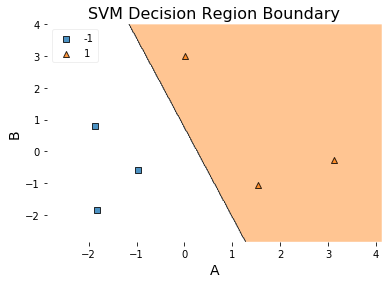

In [39]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X.values)
clf.fit(X_train2, y.values)
plot_decision_regions(X_train2, y=y.values, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

# Mining of Massive Datasets - Page 439 --- Exercise 12.4.3: (a), (b)
## Nearest Neighbors

In [27]:
import numpy as np
import pandas as pd

In [36]:
points = np.array([[1,1],[2,2],[4,3],[8,4],[16,5],[32,6]])

(a) the label of the nearest neighbor

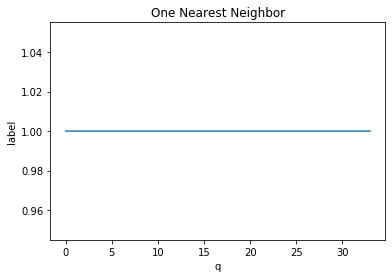

In [40]:
import matplotlib.pyplot as plt

def nn_interpolation(train, q):
    nearest_dist = 99999 # setting an arbitrarily large starting distance
    for points in train:
        x = points[0]
        y = points[1]
        if abs(q - x) < nearest_dist:
            nearest_dist = abs(q - x)
            label = y
        return label
    
X = np.arange(0, 33, 0.01)
y = np.array([])
for q in x:
    y = np.append(y, nn_interpolation(points, q)) # compute f(q) or value of y for each x

plt.plot(x,y)
plt.xlabel('q')
plt.ylabel('label')
plt.title("One Nearest Neighbor")
plt.show()

(b) The average of the labels of the two nearest neighbors

In [31]:
import matplotlib.pyplot as plt

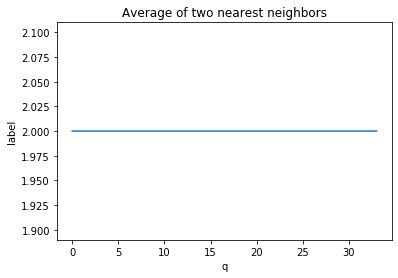

In [38]:
def nn_two_interpolation(train, q):
    distances =[]
    for point in train:
        x = point[0]
        y = point[1]
        distances.append(abs(q-x))
    
    smallest = 9999 # setting arbitrarily large starting distance
    smallest_i = 0 # setting smallest index, index of closest neighbor
    second_smallest = 9999 
    second_smallest_i = 0
    for i in range(len(distances)):
        smallest = distances[i]
        smallest_i = 1
    for i in range(len(distances)):
        if distances[i] < second_smallest and i != smallest_i:
            second_smallest = distances[i]
            second_smallest_i = 1
            
    avg_of_labels = (train[smallest_i][1] + train[second_smallest_i][1]) / 2
    
    return avg_of_labels

x = np.arange(0 , 33, 0.01)
y = np.array([])
for q in X:
    y = np.append(y, nn_two_interpolation(points, q))
    

plt.plot(x,y)
plt.xlabel('q')
plt.ylabel('label')
plt.title("Average of two nearest neighbors")
plt.show()
        